In [5]:
%load_ext autoreload
import pybamm
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pybamm_bayes.workflows.utils.parameter_sets.airbus_nmc import airbus_cell_parameters

pybamm.set_logging_level("INFO")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Q_li ~ 4.4
parameter_values["Initial concentration in negative electrode [mol.m-3]"]
parameter_values["Initial concentration in positive electrode [mol.m-3]"]

In [43]:
%autoreload 2
data = pd.read_csv("scratch/SN01_cycle_1.csv")
data["time"] = data["time"].values - data["time"].values[0]

current = pybamm.Interpolant(x = data.time.values, y = -1*data.current.values, children=pybamm.t)

parameter_values = airbus_cell_parameters()
parameter_values["Current function [A]"] = current

# Initialize model
model = pybamm.lithium_ion.DFN(options={})

rpt_experiment = pybamm.Experiment(
    [
        (
            "Charge at C/2 until 4.2 V",
            "Hold at 4.2 V until 68mA",
            "Rest for 15 min",
            "Rest for 15 min",
            "Discharge at C/5 for 1 hour",
            "Discharge at C/20 for 30 s",
            "Discharge at C/5 for 2 hours",
            "Discharge at C/20 for 30 s",
            "Discharge at C/5 until 2.5 V",
            "Rest for 15 min"
        )
    ]
    * 1,
    period="0.5 seconds",
)

simulation = pybamm.Simulation(
    model=model,
    parameter_values=parameter_values,
    # experiment=rpt_experiment
)

solution = simulation.solve(initial_soc=f"{data.output.values[0] - 0.1} V")
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = data["time"]/3600, 
    y = data["output"], name = "Data"))
fig.add_trace(go.Scatter(x = solution.t/3600, 
                         y = solution["Terminal voltage [V]"].entries,
                         name = "Sim"))
fig.update_xaxes(title="Time [h]")
fig.update_yaxes(title="Voltage [V]")

2024-08-30 11:51:13.936 - [INFO] base_model._build_model(777): Start building Doyle-Fuller-Newman model
2024-08-30 11:51:13.960 - [INFO] base_battery_model.build_model(1042): Finish building Doyle-Fuller-Newman model
2024-08-30 11:51:13.967 - [INFO] parameter_values.process_model(440): Start setting parameters for ElectrodeSOH model
2024-08-30 11:51:13.973 - [INFO] parameter_values.process_model(509): Finish setting parameters for ElectrodeSOH model
2024-08-30 11:51:13.974 - [INFO] discretisation.process_model(149): Start discretising ElectrodeSOH model
2024-08-30 11:51:13.980 - [INFO] discretisation.process_model(251): Finish discretising ElectrodeSOH model
2024-08-30 11:51:13.981 - [INFO] base_solver.solve(744): Start solving ElectrodeSOH model with Algebraic solver (lm)
2024-08-30 11:51:13.981 - [INFO] base_solver.set_up(117): Start solver set-up
2024-08-30 11:51:13.990 - [INFO] base_solver.set_up(286): Finish solver set-up
2024-08-30 11:51:13.992 - [INFO] base_solver.solve(974): Fi

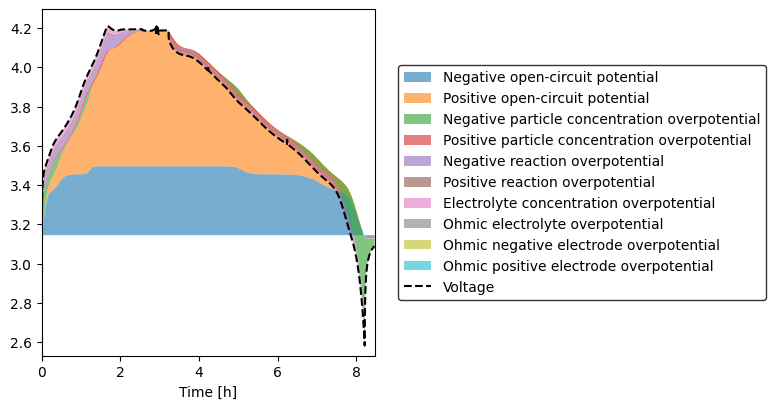

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [45]:
pybamm.plot_voltage_components(solution, split_by_electrode=True)

In [ ]:
data = pd.read_csv("scratch/SN01_cycle_1.csv")
data = data[data.index<460]

# data = data[data.index>419]
data["time"] = data["time"].values - data["time"].values[0]


current = pybamm.Interpolant(x = data.time.values, y = -1*data.current.values, children=pybamm.t)

parameter_values["Current function [A]"] = current


# Initialize model
# model = pybamm.lithium_ion.DFN(options={})

rpt_experiment = pybamm.Experiment(
    [
        (
            "Charge at C/2 until 4.2 V",
            "Hold at 4.2 V until 68mA",
            # "Rest for 15 min",
            # "Rest for 15 min",
            # "Discharge at C/5 for 1 hour",
            # "Discharge at C/20 for 30 s",
            # "Discharge at C/5 for 2 hours",
            # "Discharge at C/20 for 30 s",
            # "Discharge at C/5 until 2.5 V",
            # "Rest for 15 min"
        )
    ]
    * 1,
    period="0.5 seconds",
)

simulation = pybamm.Simulation(
    model=model,
    parameter_values=parameter_values,
    # experiment=rpt_experiment
)

solution = simulation.solve(initial_soc=f"{data.output.values[0]  - 0.1} V")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = data["time"]/3600, 
    y = data["output"], name = "Data"))
fig.add_trace(go.Scatter(x = solution.t/3600, 
                         y = solution["Terminal voltage [V]"].entries,
                         name = "Sim"))
fig.update_xaxes(title="Time [h]")
fig.update_yaxes(title="Voltage [V]")

In [ ]:
pybamm.plot_voltage_components(solution, split_by_electrode=True)

NameError: name 'pybamm' is not defined

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = data["time"]/3600, 
    y = -1*data["current"], name = "Data"))
fig.add_trace(go.Scatter(x = solution.t/3600, 
                         y = solution["Current [A]"].entries,
                         name = "Sim"))